In [1]:
!pip install dwave-ocean-sdk --quiet


In [2]:
import networkx as nx
from dwave_networkx.algorithms.max_cut import maximum_cut
from dimod.reference.samplers import ExactSolver
from google.colab import files
import matplotlib.pyplot as plt




In [3]:
uploaded = files.upload()


Saving scenario_model (2).graphml to scenario_model (2) (1).graphml


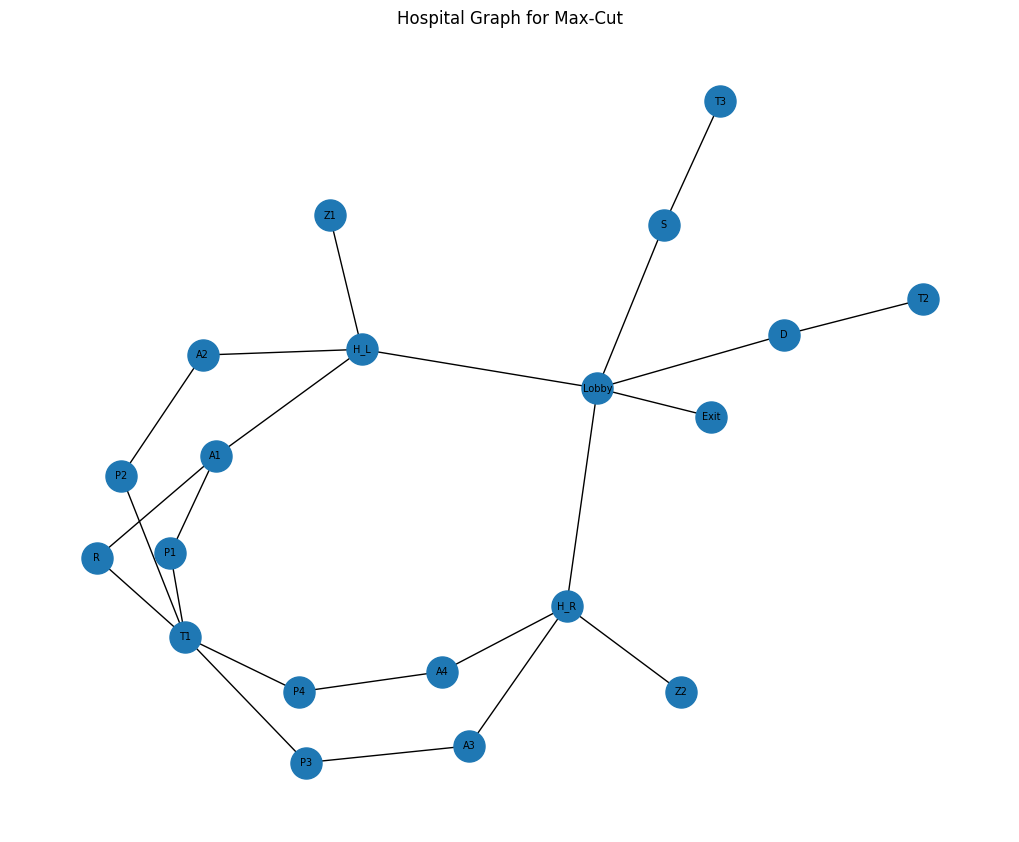

In [5]:
G = nx.read_graphml("scenario_model (2).graphml")
G = G.to_undirected()
nx.set_edge_attributes(G, 1, "weight")

plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_size=500, font_size=7)
plt.title("Hospital Graph for Max-Cut")
plt.show()


In [6]:
partition = maximum_cut(G, sampler=ExactSolver())
print("Max-Cut Partition groups (two lists):")
print(partition)



Max-Cut Partition groups (two lists):
{'P2', 'H_R', 'R', 'Exit', 'H_L', 'S', 'D', 'P1', 'P4', 'P3'}


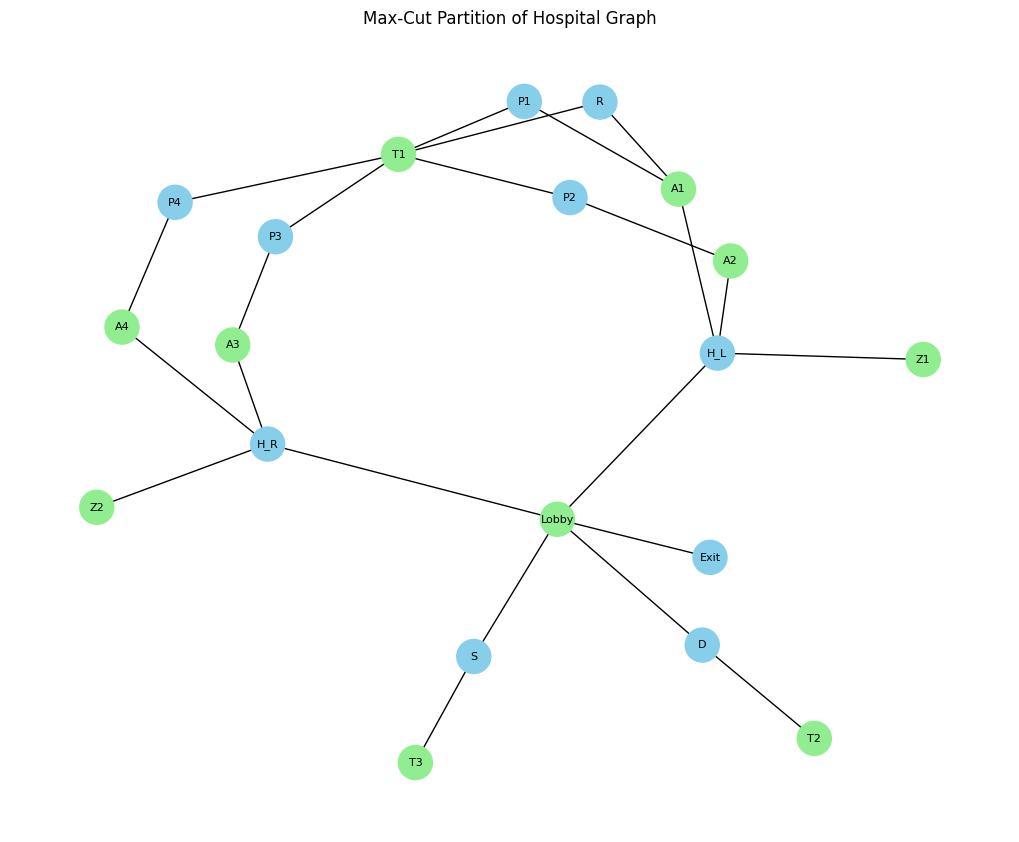

In [8]:
# Draw partition result
color_map = []
for node in G.nodes():
    if node in partition:
        color_map.append("skyblue")
    else:
        color_map.append("lightgreen")

plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color=color_map, node_size=600, font_size=8)
plt.title("Max-Cut Partition of Hospital Graph")
plt.show()
